In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')

In [2]:
# Colors:
colors1 = ['#314D63','#B2E8E8','#8FB9AB'] 
colors2 = ['#F4D096','#F08976','#4663BE','#8DBAFE','#21AEE4','#85F1FE','#C6CEFF']

In [3]:
data = pd.read_csv('datasetSiswaKuwus.csv')
data.shape

(219, 19)

In [4]:
data.head()

,Nama,JK,KOMLI,ROMBEL,AGAMA,PPKn,BINDO,MAT,SEJINDO,BING,MULOK,SENBUD,PJOK,SIMDIK,FISIKA,KIMIA,DPK,KK,UKK
0,Agustinus Hendro Ambe,L,ATPH,XII ATPH A,78,82,81,79,80,79,83,78,77,80,77,76,82,82,85
1,Argoverni Sadam,L,ATPH,XII ATPH A,82,81,80,80,80,79,83,77,76,84,78,75,83,82,85
2,ARIYUDUS JEHABA,L,ATPH,XII ATPH A,82,81,80,80,80,80,83,78,77,84,78,75,83,81,84
3,AVENSIANUS FORBIN YONSAN TANGGUNG,L,ATPH,XII ATPH A,83,83,82,80,80,83,83,79,78,84,78,84,82,84,87
4,BENEDIKTA KETRIANI,P,ATPH,XII ATPH A,84,83,82,82,80,88,83,78,77,84,80,78,83,83,86


In [5]:
# Checking any null values in the dataset
data.isnull().sum()

Nama       0
JK         0
KOMLI      0
ROMBEL     0
AGAMA      0
PPKn       0
BINDO      0
MAT        0
SEJINDO    0
BING       0
MULOK      0
SENBUD     0
PJOK       0
SIMDIK     0
FISIKA     0
KIMIA      0
DPK        0
KK         0
UKK        0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGAMA,219.0,81.255708,1.985822,78.0,80.0,81.0,83.0,86.0
PPKn,219.0,82.570776,1.240843,81.0,82.0,83.0,83.0,86.0
BINDO,219.0,81.570776,1.240843,80.0,81.0,82.0,82.0,85.0
MAT,219.0,80.817352,1.676462,78.0,79.5,80.0,82.0,85.0
SEJINDO,219.0,80.529680,1.321240,76.0,80.0,80.0,81.0,90.0
BING,219.0,83.356164,5.157260,79.0,80.0,81.0,85.5,96.0
MULOK,219.0,82.360731,0.996559,80.0,82.0,82.0,83.0,86.0
SENBUD,219.0,78.529680,0.879317,77.0,78.0,78.0,79.0,81.0
PJOK,219.0,77.529680,0.879317,76.0,77.0,77.0,78.0,80.0
SIMDIK,219.0,81.196347,1.440816,80.0,80.0,81.0,83.0,85.0


In [7]:
def analysis(feature):
    
    data_ = data[feature].value_counts().sort_values(ascending=True)
    plt.figure(figsize=(20,5), facecolor='white')
    plt.subplot(1,2,1)
    plt.barh(y=data_.index, width=data_.values, 
             height=0.7, color=colors1, edgecolor='k',linewidth=1)
    sns.despine()
    
    ax = plt.subplot(1,2,2)
    ax.pie(x=data_.values, 
           labels=data_.index, 
           colors=colors2, 
           radius=1.2, 
           autopct="%1.1f%%", 
           shadow=True, 
           explode=[0.04 for i in range(data[feature].nunique())])
    ax.add_artist(plt.Circle((0,0), 0.4, fc='white'))
    plt.suptitle(t=feature, x=0.5, y=1.1, fontfamily='serif', fontsize=20, color='k', fontweight='bold',alpha=0.8)
    plt.show()

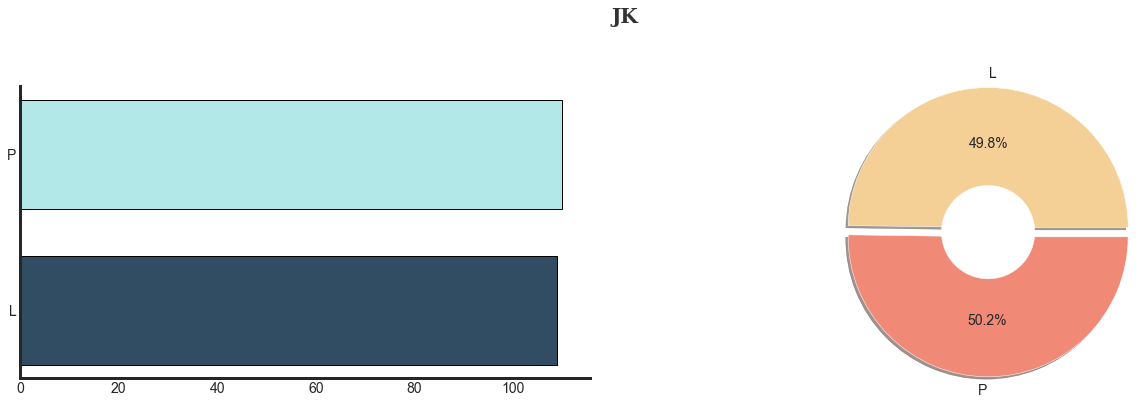

In [8]:
analysis('JK')

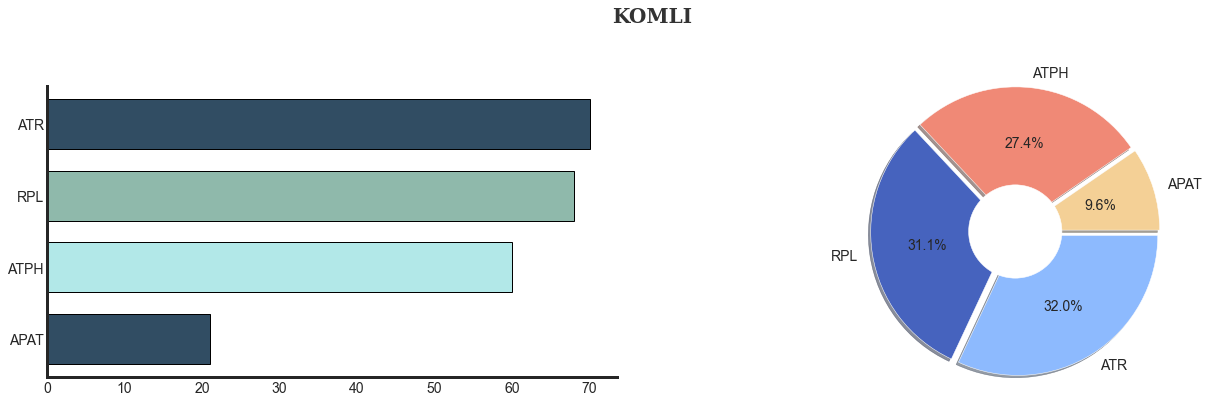

In [45]:
analysis("KOMLI")

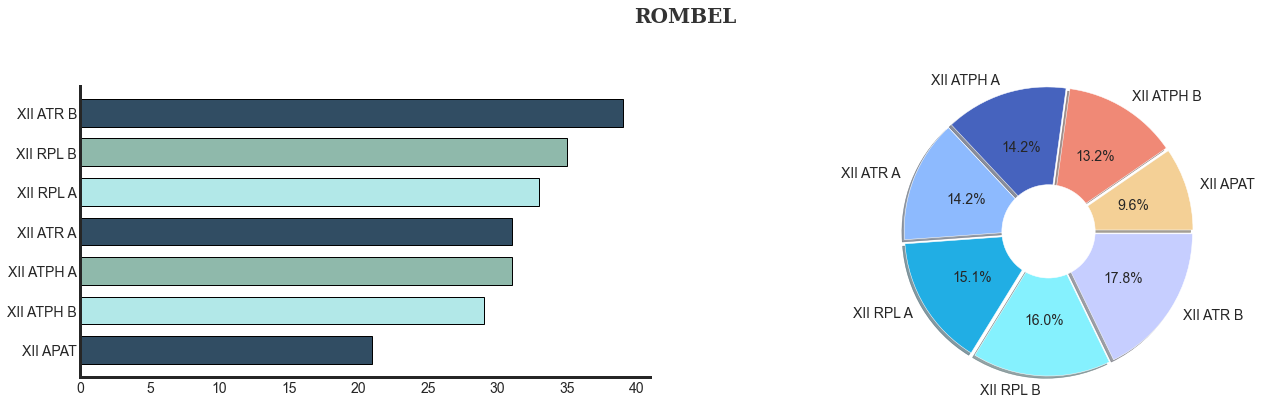

In [9]:
analysis('ROMBEL')

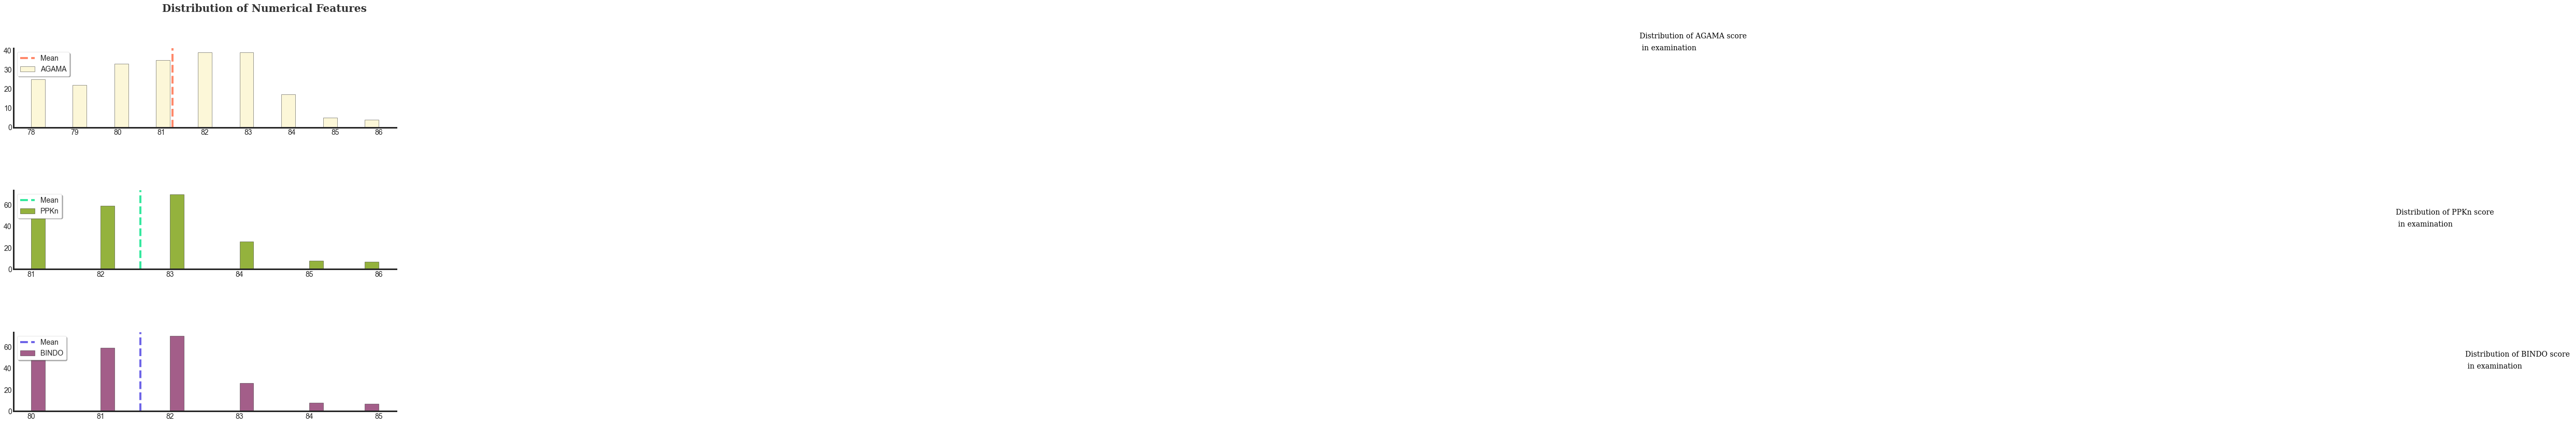

In [10]:
fig = plt.figure(figsize=(16,12), facecolor='white')
gs = fig.add_gridspec(3, 4)
gs.update(wspace=0.25, hspace=0.8)

ax1 = fig.add_subplot(gs[0,0:3])
ax1.hist(data=data, x='AGAMA', bins=25, color='#FCF6CF',edgecolor='k',alpha=.8)
ax1.axvline(x=data['AGAMA'].mean(), color='#FF886A', linestyle='--', label='Mean')
ax1.text(x=115, y=40, s='Distribution of AGAMA score \n in examination',fontfamily='serif', fontsize=14, color='k', alpha=1, linespacing=1.8)
ax1.legend(loc='upper left', shadow=True)

ax2 = fig.add_subplot(gs[1,0:3])
ax2.hist(data=data, x='PPKn', bins=25, color='#799F0C',edgecolor='k',alpha=.8)
ax2.text(x=115, y=40, s='Distribution of PPKn score \n in examination',fontfamily='serif', fontsize=14, color='k', alpha=1, linespacing=1.8)
ax2.axvline(x=data['PPKn'].mean(), color='#34E89E', linestyle='--', label='Mean')
ax2.legend(loc='upper left', shadow=True)

ax3 = fig.add_subplot(gs[2,0:3])
ax3.hist(data=data, x='BINDO', bins=25, color='#8C366C',edgecolor='k',alpha=.8)
ax3.text(x=115, y=40, s='Distribution of BINDO score \n in examination',fontfamily='serif', fontsize=14, color='k', alpha=1, linespacing=1.8)
ax3.axvline(x=data['BINDO'].mean(), color='#6E64E7', linestyle='--', label='Mean')
ax3.legend(loc='upper left', shadow=True)

fig.suptitle('Distribution of Numerical Features',fontfamily='serif', fontsize=20, color='k', fontweight='bold',alpha=0.8)
sns.despine()
plt.show()

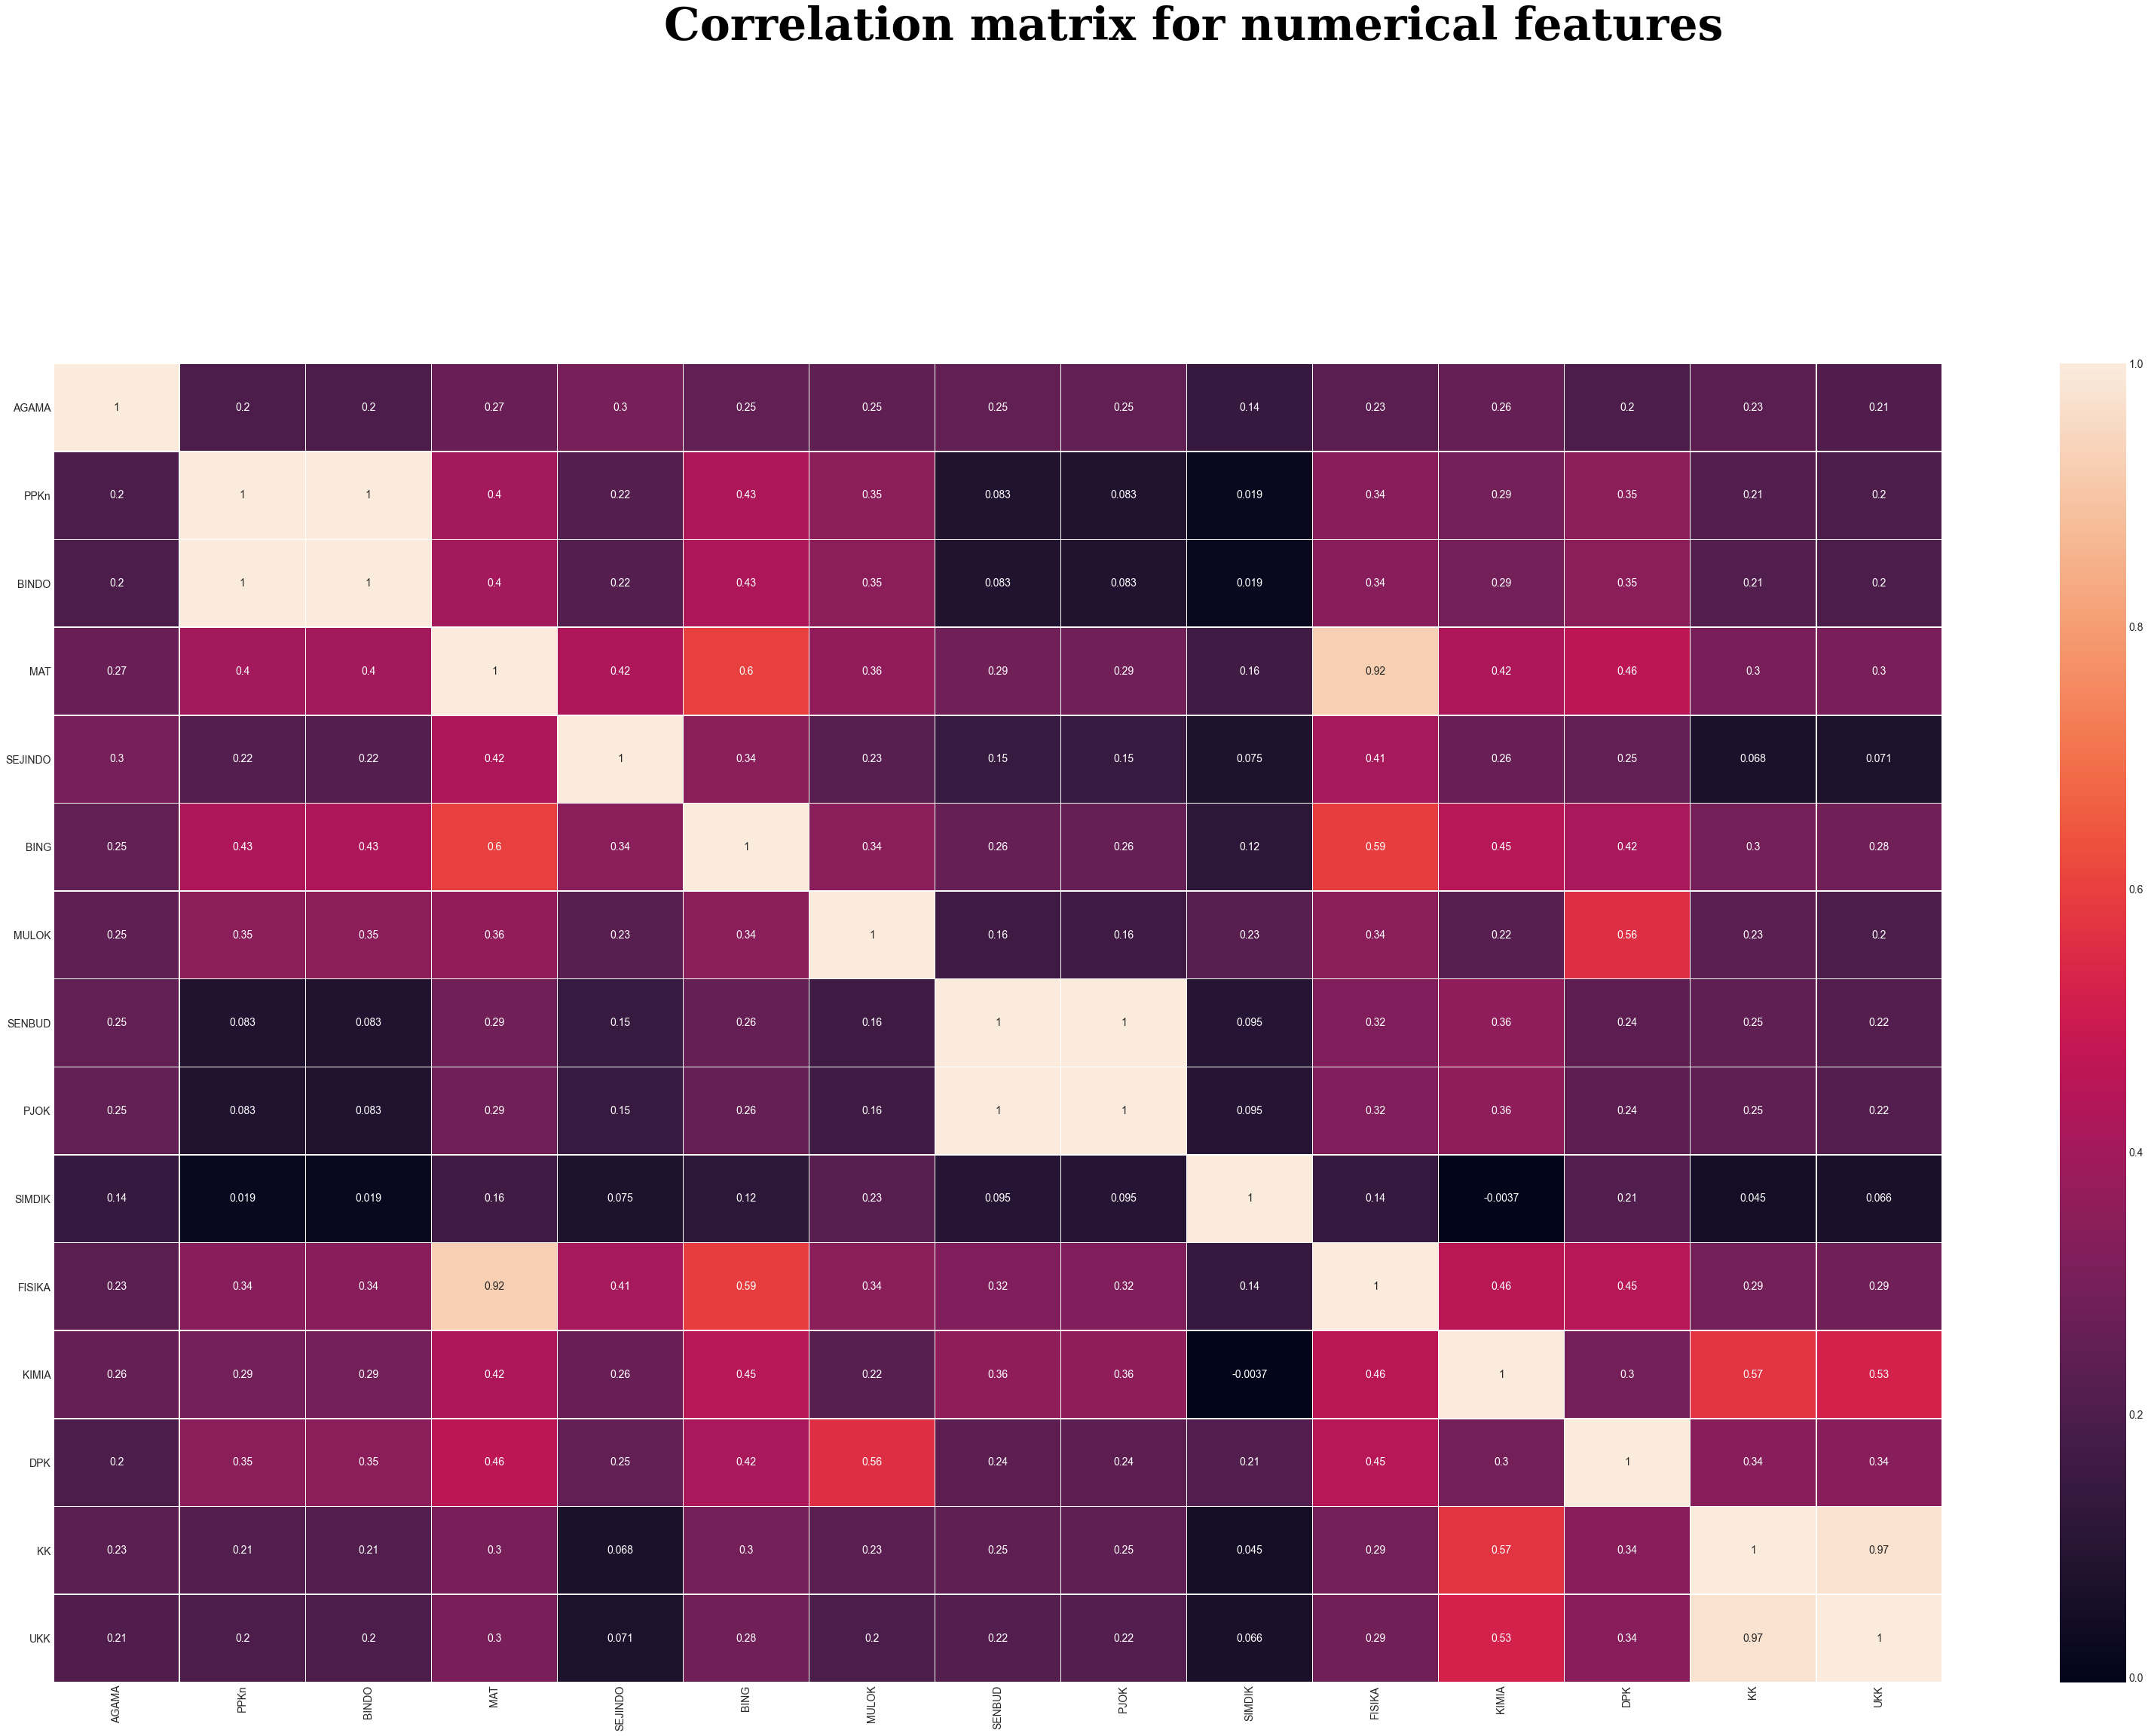

In [56]:
plt.figure(figsize=(50,30))
plt.suptitle('Correlation matrix for numerical features', x=0.5, y=1.1, fontfamily='serif', fontsize=60, color='k', fontweight='bold')
sns.heatmap(data.corr(), cmap='rocket', linewidth=0.5, annot=True)
plt.text(s=''' ''',
                    x=4, y=2.5,
                    fontfamily='serif', fontsize=50, color='#FF886A', alpha=0.8, linespacing=1.8)

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

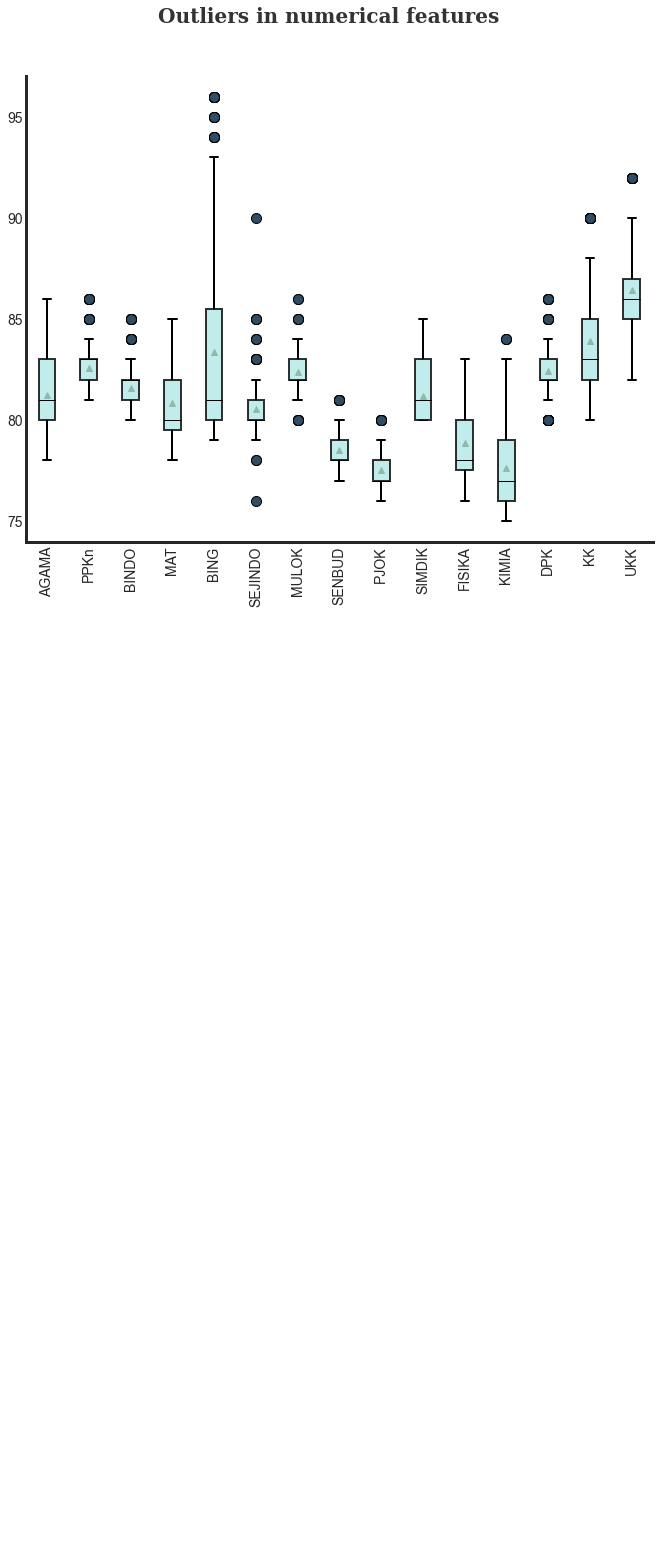

In [26]:
plt.figure(figsize=(10,8))
boxdata = data[['AGAMA', 'PPKn', 'BINDO','MAT','BING','SEJINDO',
                'MULOK','SENBUD','PJOK','SIMDIK','FISIKA','KIMIA','DPK','KK','UKK']]
#314D63','#B2E8E8'
plt.boxplot(boxdata, showmeans=True, widths=0.4, patch_artist=True,
            flierprops=dict(markerfacecolor='#314D63', marker='o', markersize=10),
            boxprops=dict(linewidth=2,facecolor='#B2E8E8', color='k', alpha=0.8),
            whiskerprops=dict(linewidth=2),
            capprops=dict(linewidth=2), 
            medianprops=dict(linewidth=1, color='k'))

plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], labels=boxdata.columns, fontsize=14)

plt.suptitle('Outliers in numerical features', x=0.5, y=1, fontfamily='serif', fontsize=20, color='k', fontweight='bold',alpha=0.8)

plt.text(s='''
           
           ''',
                    x=3.5, y=25,
                    fontfamily='serif', fontsize=14, color='k', alpha=0.8, linespacing=1.8)
sns.despine()
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [21]:
def myScatter(hue, palette):
    
    fig = plt.figure(figsize=(18,20))
    gs = fig.add_gridspec(3, 4)
    gs.update(wspace=0.5, hspace=0.3)

    ax0 = fig.add_subplot(gs[0,0:2])
    sns.scatterplot(data=data, x='KK', y='KK', hue=hue, s=100, palette=palette, alpha=0.7, ax=ax0)
    ax01 = fig.add_subplot(gs[0,2:4])
    sns.scatterplot(data=data, x='UKK', y='UKK', hue=hue, s=100, palette=palette, alpha=0.7, ax=ax01)
    plt.ylabel(ylabel=None)

    ax1 = fig.add_subplot(gs[1,0:2])
    sns.scatterplot(data=data, x='KK', y='KK', hue=hue, s=100, palette=palette, alpha=0.7, ax=ax1)
    ax11 = fig.add_subplot(gs[1,2:4])
    sns.scatterplot(data=data, x='UKK', y='UKK', hue=hue, s=100, palette=palette, alpha=0.7, ax=ax11)
    plt.ylabel(ylabel=None)

    ax2 = fig.add_subplot(gs[2,0:2])
    sns.scatterplot(data=data, x='KK', y='KK', hue=hue, s=100, palette=palette, alpha=0.7, ax=ax2)
    ax21 = fig.add_subplot(gs[2,2:4])
    sns.scatterplot(data=data, x='UKK', y='UKK', hue=hue, s=100, palette=palette, alpha=0.7, ax=ax21)
    plt.ylabel(ylabel=None)

    sns.despine()
    plt.show()

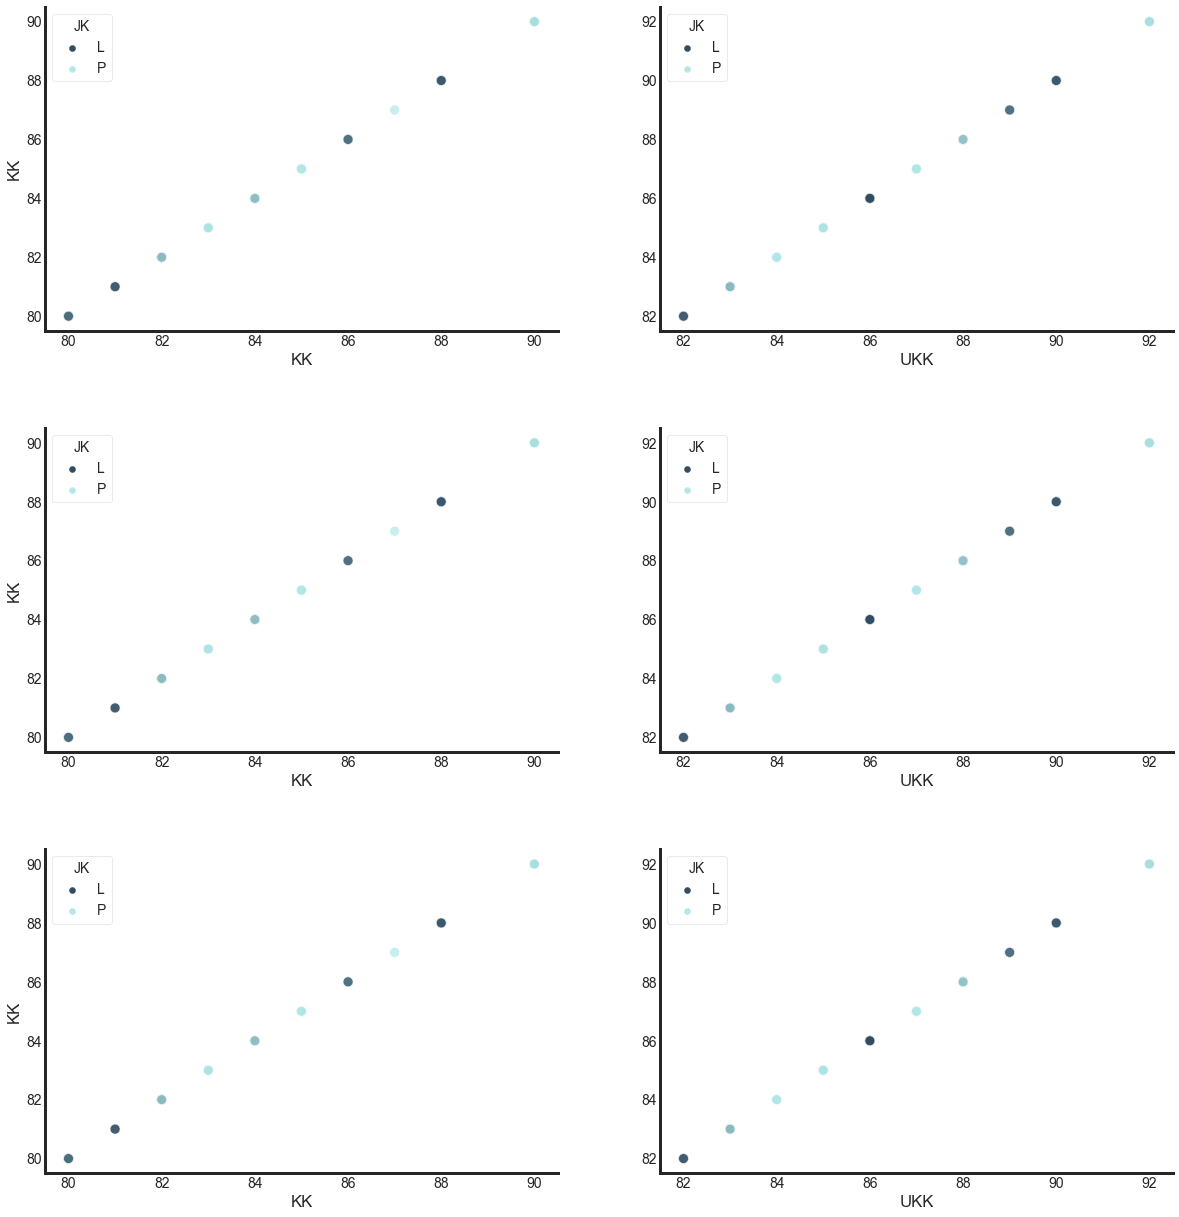

In [27]:
palette1 = sns.set_palette(sns.color_palette(colors1))
myScatter('JK', palette1)

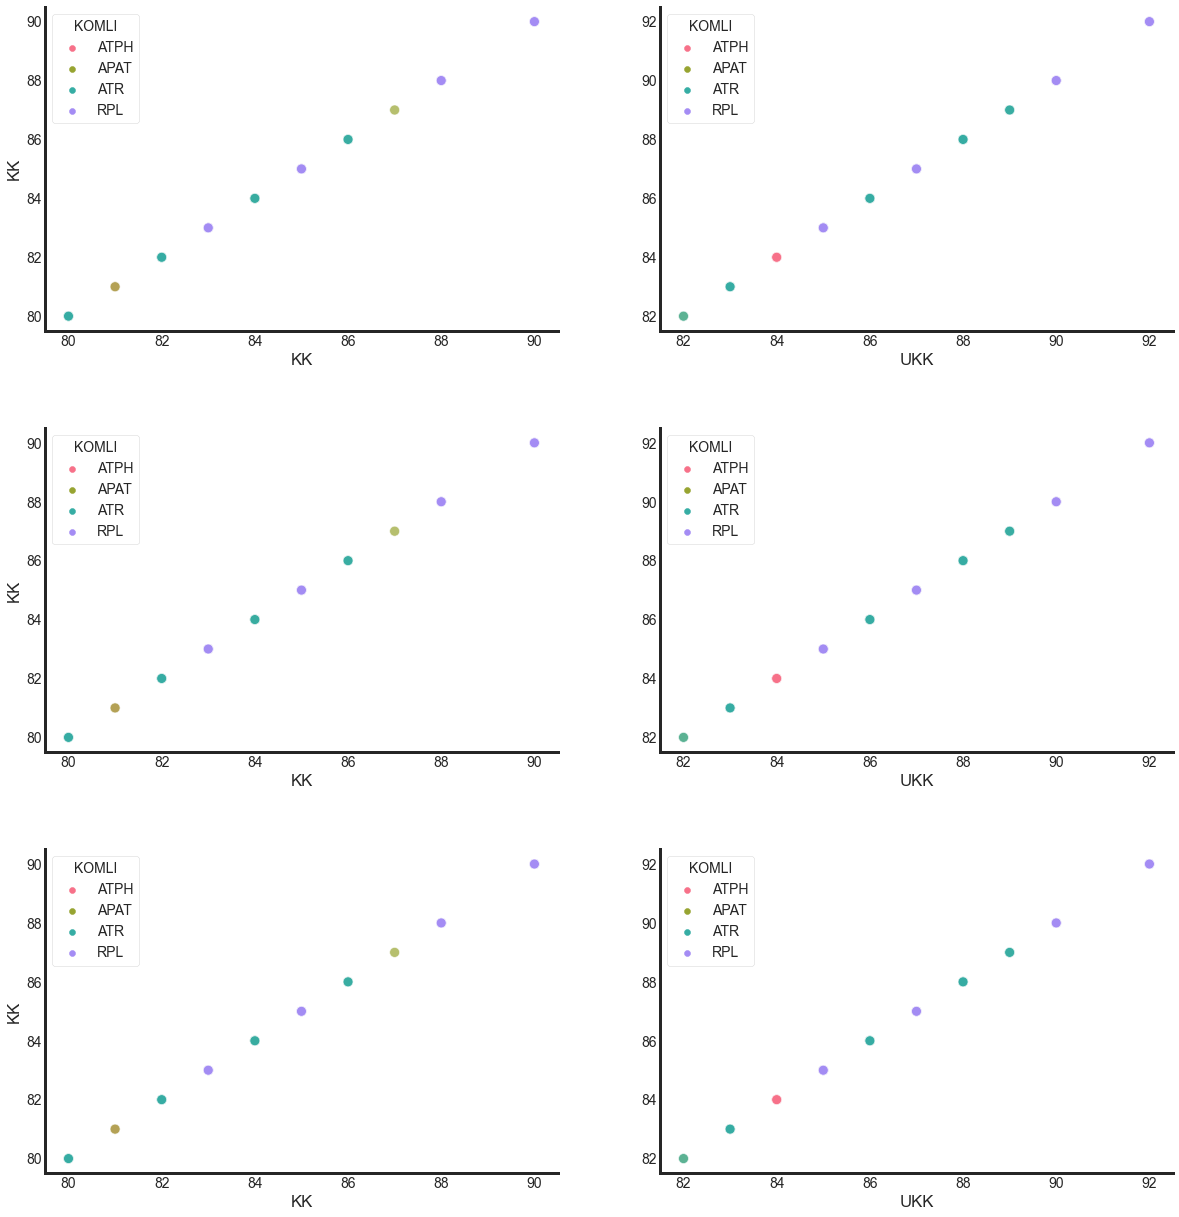

In [24]:
palette1 = sns.set_palette(sns.color_palette(colors1))
myScatter('KOMLI', palette1)

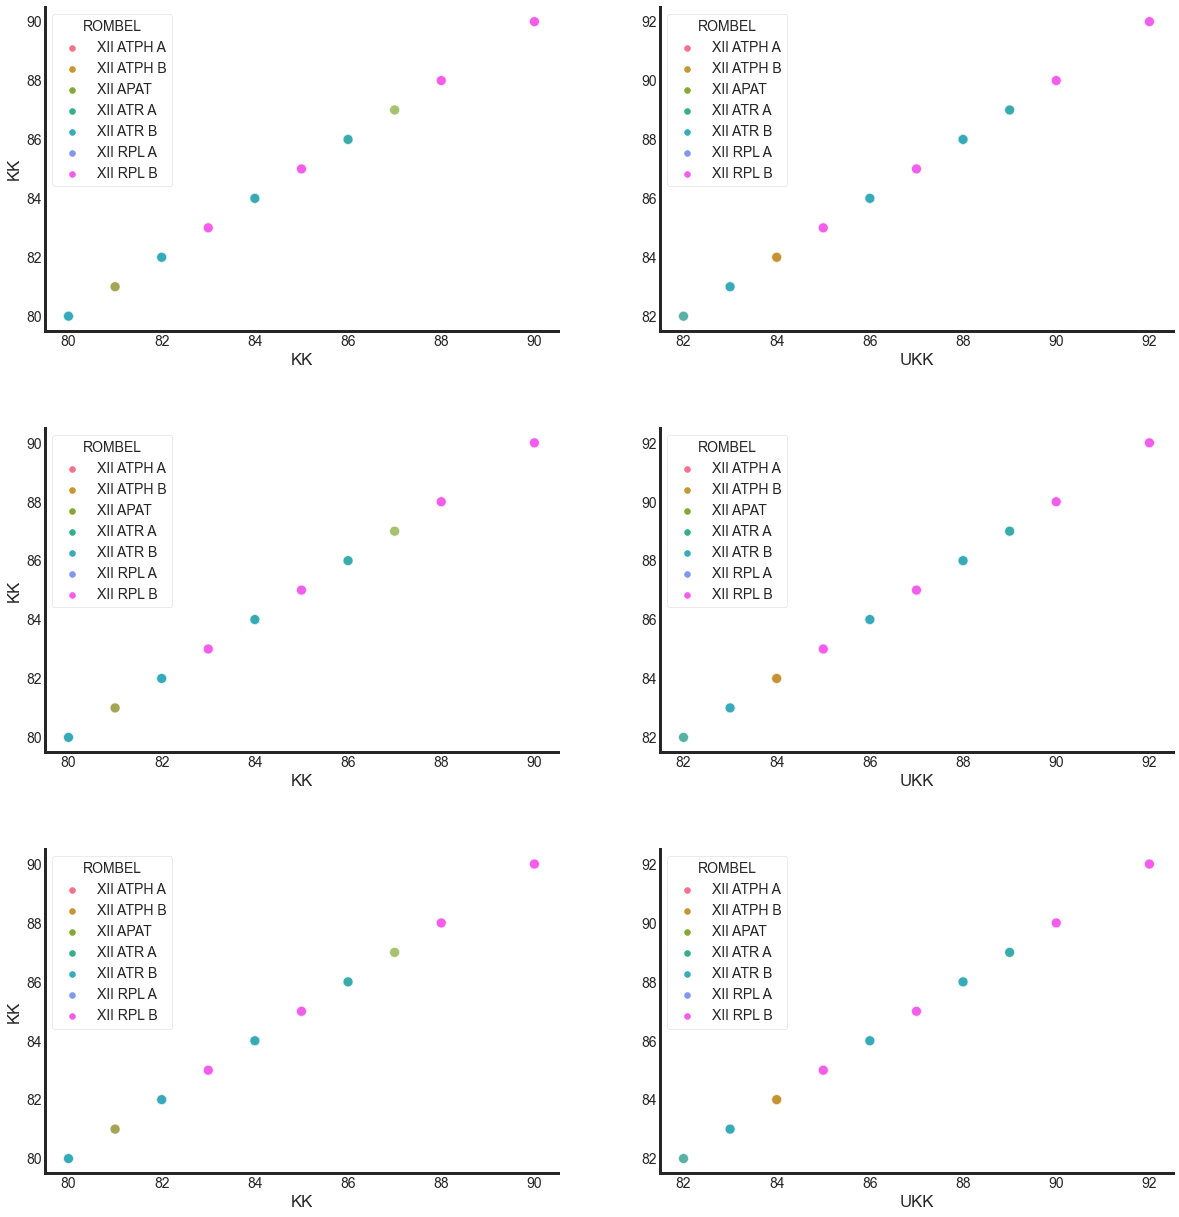

In [25]:
palette1 = sns.set_palette(sns.color_palette(colors1))
myScatter('ROMBEL', palette1)